In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#对数据进行解压
from zipfile import ZipFile
#对测试的数据进行解压操作
file_train_name ="../input/dogs-vs-cats/train.zip" 

with ZipFile(file_train_name,'r') as zip:
  zip.extractall()
  print('done')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv
done


In [20]:
import cv2
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D
from tensorflow.keras.layers import Flatten 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
from zipfile import ZipFile
#对测试的数据进行解压操作
file_test_name ="../input/dogs-vs-cats/test1.zip" 

with ZipFile(file_test_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [22]:

#在这里我将使用只是用训练集，使用 9 1划分 
oringinal_dataset_dir = "./train"
print(len(os.listdir(oringinal_dataset_dir)))

25000


In [23]:
data =[]
for files in os.listdir(oringinal_dataset_dir):
  image = cv2.resize(cv2.imread(os.path.join(oringinal_dataset_dir,files)),(100,100))
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  
  label = files.split(".")[0]
  if label=="cat":
    data.append([np.array(gray),np.array([1,0])])
  elif label =="dog":
    data.append([np.array(gray),np.array([0,1])])

In [24]:
print( len(data))
print(data[0:2])

25000
[[array([[106,  73, 114, ...,  68,  68,  68],
       [ 95,  73, 146, ...,  68,  68,  68],
       [ 92,  75, 164, ...,  68,  65,  66],
       ...,
       [ 46,  40,  42, ...,  65,  64,  61],
       [ 43,  40,  43, ...,  59,  59,  58],
       [ 42,  36,  44, ...,  58,  58,  57]], dtype=uint8), array([1, 0])], [array([[103,  65,  63, ...,  20,  32,  46],
       [ 41,  34,  58, ...,  21,  23,  88],
       [ 67,  42,  15, ...,  26,  31,  78],
       ...,
       [105, 105,  97, ...,  49,  41,  88],
       [108,  99, 108, ...,  57,  55,  81],
       [106, 101, 104, ...,  42,  55,  40]], dtype=uint8), array([0, 1])]]


In [25]:

train,test= train_test_split(data,test_size=0.1,shuffle=True)
print(len(train))
print(len(test))

22500
2500


In [55]:
#对数据进行处理
X = np.array([i[0] for i in train]).reshape(-1,100,100,1)
Y = np.array([i[1] for i in train])
x_valid = np.array([i[0] for i in test]).reshape(-1,100,100,1)
y_valid = np.array([i[1] for i in test])

In [27]:
print(Y.shape)

(22500, 2)


In [56]:

#对于x的类型进行检查

print(type(X))
X=X.astype('float32')/255
x_valid =x_valid.astype('float32')/255 
print (X.shape) 
print (Y.shape) 
print (x_valid.shape) 
print (y_valid.shape)


<class 'numpy.ndarray'>
(22500, 100, 100, 1)
(22500, 2)
(2500, 100, 100, 1)
(2500, 2)


In [49]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D
from tensorflow.keras.layers import Flatten 
model = keras.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(100,100,1),padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(2,activation="softmax"))
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
model.compile(loss="categorical_crossentropy",
      optimizer=opt,
      metrics=['acc'])
history=model.fit(train_datagen.flow(X,Y,batch_size=100),epochs=500,validation_data=(x_valid,y_valid),verbose=1)
model.save('./cats_and_dogs_cnn_strength.h5')
import pickle

with open('trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 128)        

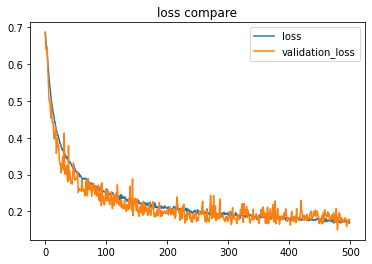

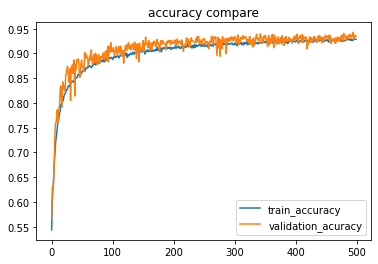

In [57]:
import pickle
import matplotlib.pyplot as plt
with open('trainHistoryDict.txt','rb') as f:
    history=pickle.load(f)
    accuracy = history['acc']
    validation_acuracy = history['val_acc']
    loss = history['loss']
    validation_loss = history['val_loss']
    plt.figure()
    plt.plot(loss,label="loss")
    plt.plot(validation_loss,label='validation_loss')
    
    plt.title('loss compare')
    plt.legend()
    plt.figure()
    plt.plot( accuracy,label='train_accuracy')
    plt.plot( validation_acuracy,label='validation_acuracy')
    plt.title('accuracy compare')
    plt.legend()
    

In [58]:
#训练集拆分之后都能达到百分之九十z左右，对测试集进行评估
#首先先定义好获取测试并进行处理数据的代码
import cv2
import os
test_dir = "./test1"

id_line = []
def create_test1_data(path):
  X_test = []
  for p in os.listdir(path):
    id_line.append(p.split('.')[0])
    image = cv2.resize(cv2.imread(os.path.join(path,p)),(100,100))
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    X_test.append(gray)
  X_test = np.array(X_test).reshape(-1,100,100,1)
  X_test = X_test/255.
  return X_test
x_test= create_test1_data(test_dir)

In [59]:
model = tf.keras.models.load_model("./cats_and_dogs_cnn_strength.h5",compile=False)
y_pred = model.predict(x_test)
print(y_pred.shape)
y_pred = tf.argmax(y_pred,-1)
y_pred = y_pred.numpy()


 

(12500, 2)


In [53]:
import pandas as pd

submission_df = pd.DataFrame({'id':id_line, 'label':y_pred})
submission_df.head()
daf=submission_df.sort_values(by="id",ascending=True)
daf.to_csv('./sampleSubmission.csv',index=False)


In [60]:
#重新加载数据集，对数据进行重新
model = tf.keras.models.load_model("./cats_and_dogs_cnn_strength.h5",compile=True)
y_pred = model.predict(X)

print(Y.shape)
print(y_pred.shape)
acc = keras.metrics.CategoricalAccuracy()(Y, y_pred)
print("训练集的准确度",acc)

# 验证集
y_valpred = model.predict(x_valid)
val_acc = keras.metrics.CategoricalAccuracy()(y_valid, y_valpred)
print("验证集的准确度",val_acc)



(22500, 2)
(22500, 2)
训练集的准确度 tf.Tensor(0.9486222, shape=(), dtype=float32)
验证集的准确度 tf.Tensor(0.934, shape=(), dtype=float32)


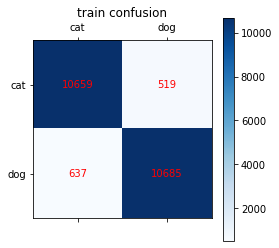

In [66]:
from sklearn.metrics import confusion_matrix
confusion_y_pred = tf.argmax(y_pred,-1)
confusion_Y= tf.argmax(Y,-1)
cm1 = confusion_matrix(confusion_Y, confusion_y_pred)
classes = ['cat','dog']
labels = range(2)
plt.matshow(cm1, cmap=plt.cm.Blues)
plt.title("train confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for x in range(len(cm1)):
    for y in range(len(cm1)):
        plt.annotate(cm1[x,y], xy = (x,y),
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                     , color='r'
                     )
plt.grid(True, which='minor', linestyle='-')

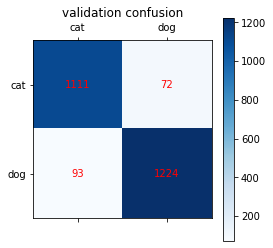

In [65]:
confusion_y_pred = tf.argmax(y_valpred,-1)
confusion_Y= tf.argmax(y_valid,-1)
cm2 = confusion_matrix(confusion_Y, confusion_y_pred)
classes = ['cat','dog']
labels = range(2)
plt.matshow(cm2, cmap=plt.cm.Blues)
plt.title("validation confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for x in range(len(cm2)):
    for y in range(len(cm2)):
        plt.annotate(cm2[x,y], xy = (x,y),
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                     , color='r'
                     )
plt.grid(True, which='minor', linestyle='-')
